In [2]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder

In [3]:
transform_train = transforms.Compose(
    [
        transforms.Resize(102),
        transforms.CenterCrop(100),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomAdjustSharpness(.5),
        transforms.ToTensor(),
    ]
)
transform_test = transforms.Compose(
    [
        transforms.Resize(102),
        transforms.CenterCrop(100),
        transforms.ToTensor(),
    ]
)

In [4]:
Dataset_test = ImageFolder('../data/test/',transform_test)
Dataset_test

Dataset ImageFolder
    Number of datapoints: 2250
    Root location: ../data/test/
    StandardTransform
Transform: Compose(
               Resize(size=102, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(100, 100))
               ToTensor()
           )

In [5]:
Dataset_train = ImageFolder('../data/train/',transform_train)
Dataset_train

Dataset ImageFolder
    Number of datapoints: 70626
    Root location: ../data/train/
    StandardTransform
Transform: Compose(
               Resize(size=102, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(100, 100))
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomAdjustSharpness(sharpness_factor=0.5,p=0.5)
               ToTensor()
           )

In [6]:
BATCH_SIZE = 50
dataloader_train = data.DataLoader(Dataset_train,BATCH_SIZE,True)
len(dataloader_train)

1413

In [7]:
dataloader_test = data.DataLoader2(Dataset_test,BATCH_SIZE,True)
len(dataloader_test)

45

In [8]:
sample = dataloader_train.__iter__().__next__()

In [9]:
x = torchvision.utils.make_grid(sample[0])
x.size()

torch.Size([3, 818, 818])

In [10]:
x = x.numpy().transpose([1,2,0])
x

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.5294118 , 0.5294118 , 0.5254902 ],
        ...,
        [0.3882353 , 0.3764706 , 0.20784314],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.4117647 , 0

In [11]:
import matplotlib.pyplot as plt

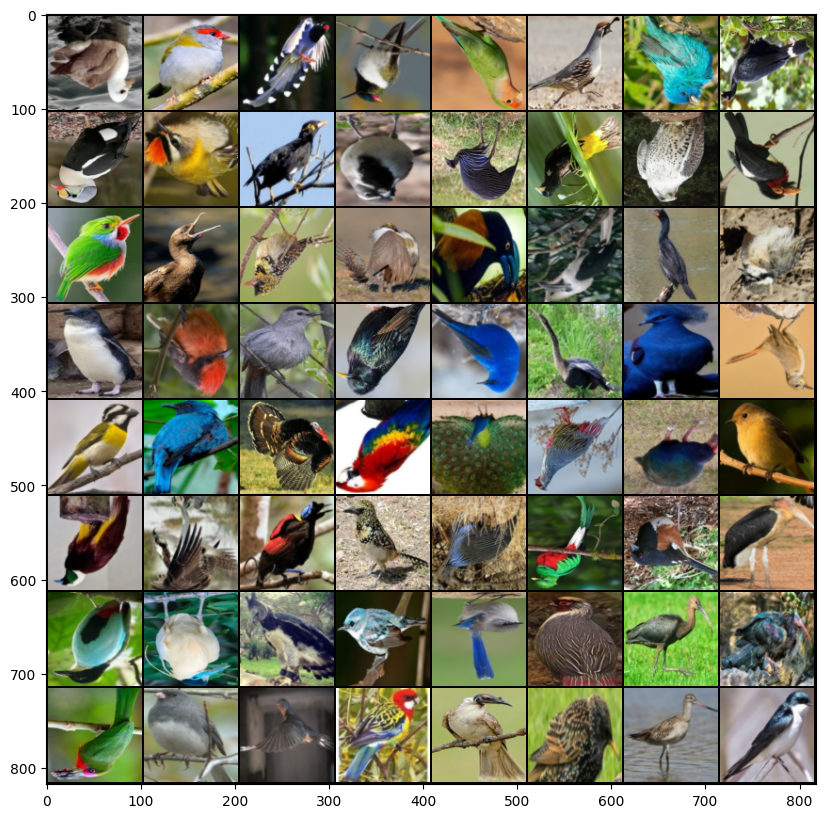

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(x)
plt.show()

In [13]:
input_shape = sample[0].size()
input_shape

torch.Size([64, 3, 100, 100])

In [14]:
torchvision.models.AlexNet()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [8]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.block_1 = nn.Sequential(nn.Conv2d(3,64,3),
                                     nn.BatchNorm2d(64),
                                     nn.ReLU(),
                                     nn.AvgPool2d(2))
        self.block_2 = nn.Sequential(nn.Conv2d(64,128,3),
                                     nn.BatchNorm2d(128),
                                     nn.ReLU(),
                                     nn.AvgPool2d(2))
        self.block_3 = nn.Sequential(nn.Conv2d(128,64,4),
                                     nn.BatchNorm2d(64),
                                     nn.ReLU(),
                                     nn.AvgPool2d(2))
        self.avg_pool = nn.AdaptiveAvgPool2d((6,6))
        self.last = nn.Sequential(
                                    nn.Dropout(),
                                    nn.Linear(6*6*64,4560),
                                    nn.ReLU(),
                                    nn.Dropout(),
                                    nn.Linear(4560,4560),
                                    nn.ReLU(),
                                    nn.Dropout(),
                                    nn.Linear(4560,len(Dataset_train.classes))
        )

        # self.fc
    def forward(self,x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.avg_pool(x)
        x = nn.Flatten()(x)
        x = self.last(x)
        return nn.functional.log_softmax(x,1)

In [9]:
model = ConvNet()
optimizer = torch.optim.Adam(model.parameters(),0.001,eps=1e-8)
criterion = nn.NLLLoss()

In [10]:
loaded_data = torch.load('../models/checkpoint.tph')
model.load_state_dict(loaded_data['model'])
optimizer.load_state_dict(loaded_data['optimizer'])

In [12]:
from tqdm import tqdm
import warnings
import win32com.client as win32
warnings.filterwarnings('ignore')

def train(model,optimizer, criterion, dataloader_train,epochs,start_epoch=1):
    for epoch in range(start_epoch, epochs+1):
        pbar = tqdm(dataloader_train)
        running_loss = 0.0
        total_correct = 0
        for images, labels in pbar:
            model.train()
            pbar.set_description(f'Epoch {epoch}/{epochs} Train')
            optimizer.zero_grad()
            outs = model(images)
            loss_batch = criterion(outs, labels)
            running_loss += loss_batch
            loss_batch.backward()
            optimizer.step()

            _, preds = torch.max(outs,1)
            correct_batch = (preds == labels).sum()
            total_correct+= correct_batch.item()
            batch_accuracy = correct_batch/len(labels)
            # pbar.update()
            pbar.set_postfix({'loss':loss_batch.item(),'acc':batch_accuracy.item()})
        eval()
def eval():
    pbar = tqdm(dataloader_test)
    running_loss_test = 0.0
    total_correct_test = 0
    model.eval()
    for images, labels in pbar:
        outs = model(images)
        loss_batch = criterion(outs, labels)
        running_loss_test += loss_batch
        _, preds = torch.max(outs,1)
        correct_batch = (preds == labels).sum()
        total_correct_test += correct_batch.item()
        batch_accuracy = correct_batch/len(labels)
        pbar.set_postfix({'loss':loss_batch.item(),'acc':batch_accuracy.item()})
        del images,labels
    print(f"text_loss:{running_loss_test.item():.4f} test_acc{total_correct_test/len(Dataset_test):.4f}")



In [25]:
train(model, optimizer,criterion,dataloader_train,100,loaded_data['epoch']+1)

100%|██████████| 45/45 [00:54<00:00,  1.21s/it, loss=1.09, acc=0.76] 


text_loss:43.7035 test_acc0.7667
Epoch 32/100: train_loss:2507.8784 train_acc0.5564


100%|██████████| 45/45 [01:10<00:00,  1.57s/it, loss=1.18, acc=0.68] 


text_loss:42.9129 test_acc0.7787
Epoch 33/100: train_loss:2543.9753 train_acc0.5531


Epoch 34/100 Train:   2%|▏         | 23/1413 [00:52<52:27,  2.26s/it, loss=1.66, acc=0.68]  


KeyboardInterrupt: 

In [27]:
torch.save({'epoch':33,'model':model.state_dict(),'optimizer':optimizer.state_dict()},'../models/checkpoint.tph')

In [13]:
eval()

100%|██████████| 45/45 [01:17<00:00,  1.73s/it, loss=0.82, acc=0.84] 


text_loss:50.7236 test_acc0.7307


In [14]:
# after 33 epochs it got acc around 76 and will improve it I train it for a bit longer
# as it takes almost 45min per epoch, so I'm not going to train it
# another approach can be to use transfer learning for it.
# ResNet or Inception can be used for transfer learning.